# DLProfile Example using Distributed FFN Application

## Set imports and neccessary environment variables

In [1]:
import pathlib
import os
import sys
import matplotlib.pyplot as plt
import warnings
import pprint
import pandas as pd
import tensorflow as tf

In [2]:
VANIDL_DIR="{}".format(pathlib.Path(os.getcwd()).parent.absolute())
sys.path.insert(0, VANIDL_DIR)
warnings.filterwarnings('ignore')

In [3]:
os.environ["DARSHAN_DIR"] = "/soft/perftools/darshan/darshan-3.1.8"
os.environ["VANIDL_DIR"] = VANIDL_DIR

### Formatting

In [4]:
pp = pprint.PrettyPrinter(indent=1)
class color:
    PURPLE = '\033[95m'
    CYAN = '\033[96m'
    DARKCYAN = '\033[36m'
    BLUE = '\033[94m'
    GREEN = '\033[92m'
    YELLOW = '\033[93m'
    RED = '\033[91m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'
    END = '\033[0m'

## Create instrance of DL Profile and load the darshan file

In [5]:
from src.vanidl import VaniDL
profile = VaniDL()

In [6]:
DATAPATH_INCLUDES = []
status = profile.Load("/home/dhari/darshan-logs/apps/train_ffn/ffn_run1_p8.darshan", data_paths_include=DATAPATH_INCLUDES)
if status:
    print("Darshan Trace loaded Successfully!")
else:
    print("Darshan Trace load Failed!")
    print(profile._error_str())

Loaded Pre-processed DXT DF from file: /tmp/temp_analysis/ffn_run1_p8_io_dxt_df.csv
Loaded Pre-processed DF from file: /tmp/temp_analysis/ffn_run1_p8_io_df.csv
Loaded Pre-processed Pattern file: /tmp/temp_analysis/ffn_run1_p8_pattern.json
Darshan Trace loaded Successfully!


## Use Profile object to analyze the darshan I/O trace.

### Verify if object works

The GetDXTAsDF() function enables users to perform analysis 

In [22]:
pd.set_option('display.max_colwidth', -1)
df = profile.GetDXTAsDF()
pp.pprint("Files used in the application")
pp.pprint(df['Filename'].unique().tolist())

'Files used in the application'
['/lus/theta-fs0/projects/datascience/keceli/run/f3n/training/groundtruth.h5',
 '/lus/theta-fs0/projects/datascience/keceli/run/f3n/training/grayscale_maps.h5',
 '/lus/theta-fs0/projects/datascience/keceli/run/f3n/training/tf_record_file']


### Collect the summary of the Application

In [8]:
summary = profile.GetSummary()
print("\n")
print(color.BOLD + "Data Access Summary (from Darshan):"+ color.END)
print("Total Job time\t\t\t:\t{:0.2f} seconds".format(summary['job_time']))
#FIXME: calculate time per rank and then take max across it.
print("Time spent in I/O\t\t:\t{:0.2f} seconds".format(summary['total_io_time']))
print("% Time spent in I/O\t\t:\t{:0.2f}%".format(float(summary['total_io_time'])*100/summary['job_time']))
print("Total Data Accessed\t\t:\t{:0.2f} GB".format(float(summary['total_io_bytes'])/1024.0/1024.0/1024.0))
print("Data Access Modules used\t:\t{}".format(summary['io_interface_used']))
print("Data Operations\t\t\t:\t{}".format(summary['io_operations_used']))
print("# of files used\t\t\t:\t{}".format(len(summary['files_used'])))
print("# of MPI Ranks\t\t\t:\t{:0.0f} ranks".format(summary['num_ranks']))
      
print(color.UNDERLINE + "Data Transfer size:"+ color.END)
print("\tMin,Max\t\t\t:\t{:0.0f} bytes and {:0.0f} bytes".format(summary['data_transfer_size']['min'],summary['data_transfer_size']['max']))
print("\tAverage\t\t\t:\t{:0.0f} bytes".format(summary['data_transfer_size']['mean']))
print("\tMedian\t\t\t:\t{:0.0f} bytes".format(summary['data_transfer_size']['median']))
      
print(color.UNDERLINE + "Data Transfer bandwidth: (per rank)"+ color.END)
print("\tMin,Max\t\t\t:\t{:0.0f} B/s and {:0.0f} MB/s".format(summary['data_transfer_bandwidth']['min'],summary['data_transfer_bandwidth']['max']/1024.0/1024.0))
print("\tAverage\t\t\t:\t{:0.0f} MB/s".format(summary['data_transfer_bandwidth']['mean']/1024.0/1024.0))
print("\tMedian\t\t\t:\t{:0.0f} MB/s".format(summary['data_transfer_bandwidth']['median']/1024.0/1024.0))
      
print(color.UNDERLINE + "Access Pattern:"+ color.END)
print("\tSequential\t\t:\t{:0.2f}%".format(float(summary['access_pattern']['sequential'])))
print("\tConsecutive\t\t:\t{:0.2f}%".format(float(summary['access_pattern']['consecutive'])))
#An I/O op issued at an offset greater than where the previous I/O op ended.
#An I/O op issued at the offset immediately after the end of the previous I/O

print("\n")
print(color.BOLD + "Files Summary:"+ color.END)
print("File Types\t\t\t:\t{}".format(summary['file_used_summary']['types']))
print(color.UNDERLINE + "Dataset Size:"+ color.END)
print("\tTotal\t\t\t:\t{:0.3f} GB".format(float(summary['file_used_summary']['size']['total'])/1024.0/1024.0/1024.0))
print("\tMin,Max\t\t\t:\t{:0.3f} GB and {:0.3f} GB".format(float(summary['file_used_summary']['size']['min'])/1024.0/1024.0/1024.0,float(summary['file_used_summary']['size']['max'])/1024.0/1024.0/1024.0))
print("\tAverage\t\t\t:\t{:0.3f} GB".format(float(summary['file_used_summary']['size']['mean'])/1024.0/1024.0/1024.0))



Data Access Summary (from Darshan):
Total Job time			:	336.00 seconds
Time spent in I/O		:	121.71 seconds
% Time spent in I/O		:	36.22%
Total Data Accessed		:	1.50 GB
Data Access Modules used	:	['X_POSIX']
Data Operations			:	['read']
# of files used			:	3
# of MPI Ranks			:	8 ranks
Data Transfer size:
	Min,Max			:	8 bytes and 262144 bytes
	Average			:	19719 bytes
	Median			:	3729 bytes
Data Transfer bandwidth: (per rank)
	Min,Max			:	519 B/s and 600 MB/s
	Average			:	45 MB/s
	Median			:	4 MB/s
Access Pattern:
	Sequential		:	94.34%
	Consecutive		:	48.94%


Files Summary:
File Types			:	['h5' '']
Dataset Size:
	Total			:	2.275 GB
	Min,Max			:	0.021 GB and 2.144 GB
	Average			:	0.758 GB


In [11]:
pp.pprint("Job time : {} seconds".format(profile.GetJobTime()))

'Job time : 336.0 seconds'


In [12]:
pp.pprint("Time spent by application on I/O: {} seconds".format(profile.GetIOTime()))

'Time spent by application on I/O: 121.70667400000002 seconds'


### I/O time spent on each file

In [13]:
for file in df['Filename'].unique():
    print("I/O time for file {}: {:0.2f} seconds".format(file,profile.GetIOTime(filepath=file)))

I/O time for file /lus/theta-fs0/projects/datascience/keceli/run/f3n/training/tf_record_file: 1.92 seconds
I/O time for file /lus/theta-fs0/projects/datascience/keceli/run/f3n/training/groundtruth.h5: 4.58 seconds
I/O time for file /lus/theta-fs0/projects/datascience/keceli/run/f3n/training/grayscale_maps.h5: 63.04 seconds
I/O time for file /gpfs/mira-home/dhari/code/learnIO/benchmarks/train_ffn_cache_b1_n8_p8_t64_i1_r0.001_oadam_s00_443093/train_ffn_cache_b1_n8_p8_t64_i1_r0.001_oadam_s00_443093/graph.pbtxt.tmpea53208a6d69444bab5330f7c4592b98: 0.12 seconds
I/O time for file /gpfs/mira-home/dhari/code/learnIO/benchmarks/train_ffn_cache_b1_n8_p8_t64_i1_r0.001_oadam_s00_443093/train_ffn_cache_b1_n8_p8_t64_i1_r0.001_oadam_s00_443093/checkpoint.tmp4d5409f1f510402691215911971b95eb: 0.02 seconds
I/O time for file /gpfs/mira-home/dhari/code/learnIO/benchmarks/train_ffn_cache_b1_n8_p8_t64_i1_r0.001_oadam_s00_443093/train_ffn_cache_b1_n8_p8_t64_i1_r0.001_oadam_s00_443093/checkpoint.tmpe8bef917a4

### I/O Time spent per rank

In [14]:
for rank in df['Rank'].unique():
    print("I/O time for rank {}: {:0.2f} seconds".format(rank,profile.GetIOTime(rank=rank)))

I/O time for rank -1: 0.00 seconds
I/O time for rank 0: 15.29 seconds


In [15]:
"Total I/O performed by application: {:0.2f} GB".format(float(profile.GetIOSize())/1024.0/1024.0/1024.0)

'Total I/O performed by application: 1.50 GB'

### I/O performed on each file

In [16]:
for file in df['Filename'].unique():
    print("I/O performed on file {}: {:0.2f} MB".format(file,float(profile.GetIOSize(filepath=file))/1024.0/1024.0))

I/O performed on file /lus/theta-fs0/projects/datascience/keceli/run/f3n/training/tf_record_file: 2.00 MB
I/O performed on file /lus/theta-fs0/projects/datascience/keceli/run/f3n/training/groundtruth.h5: 131.89 MB
I/O performed on file /lus/theta-fs0/projects/datascience/keceli/run/f3n/training/grayscale_maps.h5: 1240.51 MB
I/O performed on file /gpfs/mira-home/dhari/code/learnIO/benchmarks/train_ffn_cache_b1_n8_p8_t64_i1_r0.001_oadam_s00_443093/train_ffn_cache_b1_n8_p8_t64_i1_r0.001_oadam_s00_443093/graph.pbtxt.tmpea53208a6d69444bab5330f7c4592b98: 3.46 MB
I/O performed on file /gpfs/mira-home/dhari/code/learnIO/benchmarks/train_ffn_cache_b1_n8_p8_t64_i1_r0.001_oadam_s00_443093/train_ffn_cache_b1_n8_p8_t64_i1_r0.001_oadam_s00_443093/checkpoint.tmp4d5409f1f510402691215911971b95eb: 0.00 MB
I/O performed on file /gpfs/mira-home/dhari/code/learnIO/benchmarks/train_ffn_cache_b1_n8_p8_t64_i1_r0.001_oadam_s00_443093/train_ffn_cache_b1_n8_p8_t64_i1_r0.001_oadam_s00_443093/checkpoint.tmpe8bef91

In [17]:
for rank in df['Rank'].unique():
    print("I/O performed by rank {}: {:0.2f} MB".format(rank, float(profile.GetIOSize(rank=rank))/1024.0/1024.0))

I/O performed by rank -1: 0.00 MB
I/O performed by rank 0: 164.19 MB


In [18]:
print("Size of dataset (bytes)")
pp.pprint(profile.GetFileSizes())

Size of dataset (bytes)
{'grayscale_maps': 118301389.0,
 'groundtruth': 22392831.0,
 'tf_record_file': 2302524067.0}


### How application access data over time.

[============================================================] 100.0% 73086 of 73086 Creating Timeline 


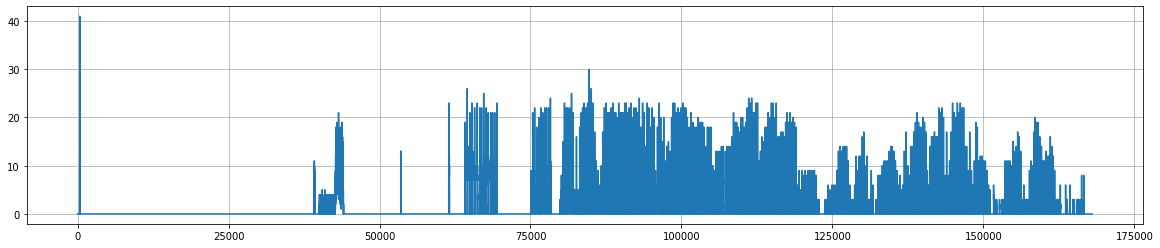

In [19]:
tl = profile.CreateIOTimeline()
plt.figure(figsize=(20,4))
plt.grid()
plt.plot(tl['time_step'], tl['operation_count']);

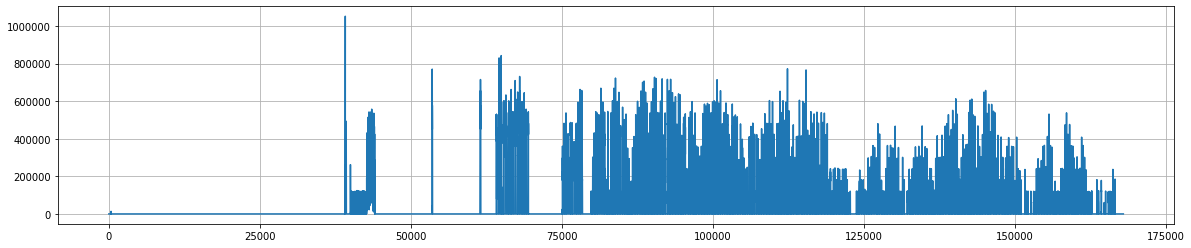

In [20]:
plt.figure(figsize=(20,4))
plt.grid()
plt.plot(tl['time_step'], tl['io_bytes']);

### How files are accessed over the duration of the Job.

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/ffn_run1_p8_tm_df_groundtruth.csv


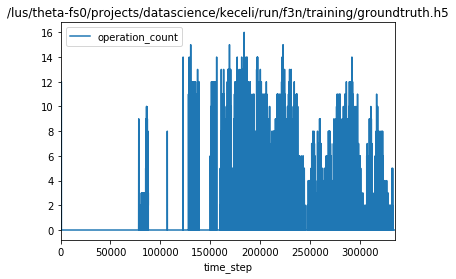

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/ffn_run1_p8_tm_df_grayscale_maps.csv


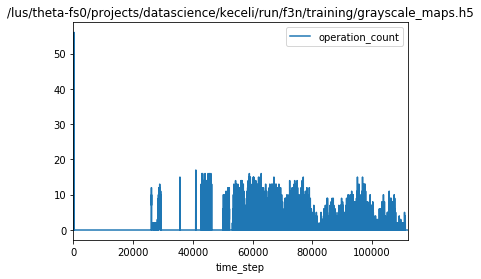

Loaded Pre-processed Timeline from file: /tmp/temp_analysis/ffn_run1_p8_tm_df_tf_record_file.csv


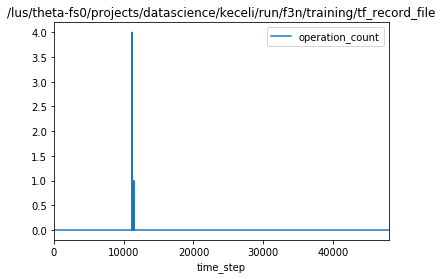

In [23]:
for file in df['Filename'].unique():
    tl = profile.CreateIOTimeline(filepath=file)
    tl.plot(x='time_step',y='operation_count', title=file)
    plt.show()

### Show how each file is accessed by each rank.

[============================================================] 100.0% 8729 of 8729 Creating Timeline 


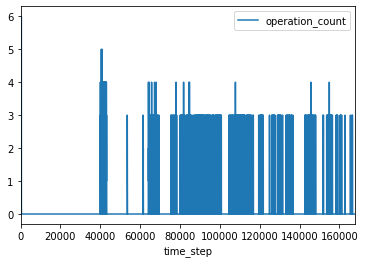

[============================================================] 100.0% 9419 of 9419 Creating Timeline 


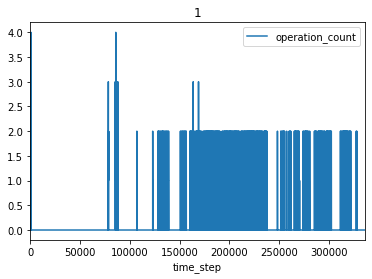

[============================================================] 100.0% 9029 of 9029 Creating Timeline 


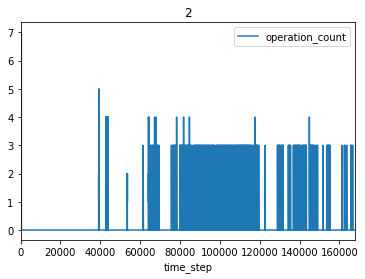

[============================================================] 100.0% 9145 of 9145 Creating Timeline 


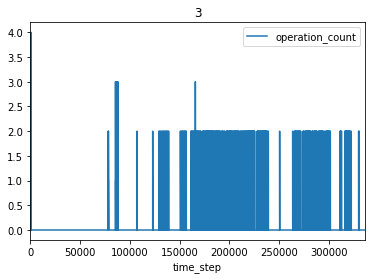

[============================================================] 100.0% 9219 of 9219 Creating Timeline 


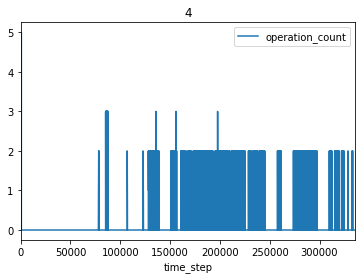

[============================================================] 100.0% 9029 of 9029 Creating Timeline 


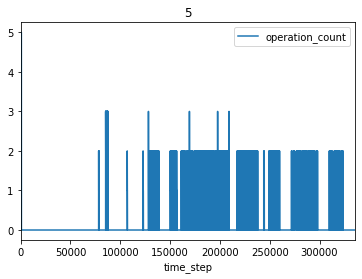

[============================================================] 100.0% 9097 of 9097 Creating Timeline 


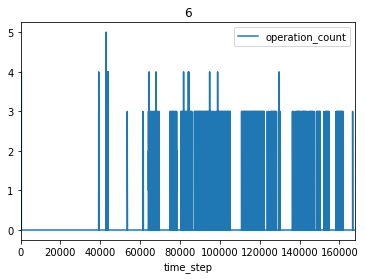

[============================================================] 100.0% 9419 of 9419 Creating Timeline 


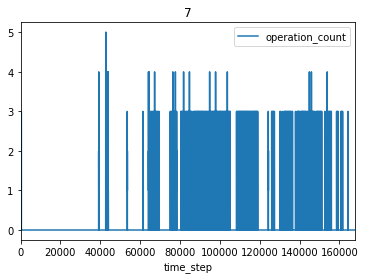

In [24]:
for rank in df['Rank'].unique():
    tl = profile.CreateIOTimeline(rank=rank)
    tl.plot(x='time_step',y='operation_count', title=rank)
    plt.show()

### Data Transfer Size distribution within the application

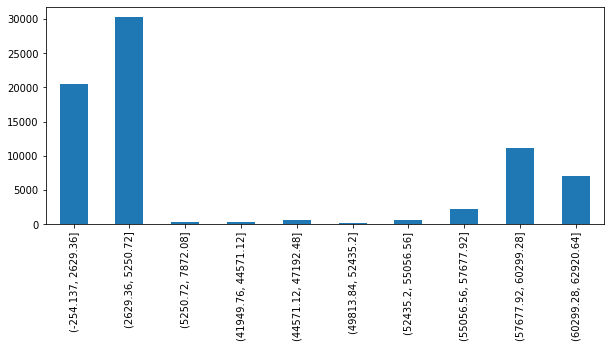

In [25]:
request_df = profile.GetIORequestDistribution()
request_df.plot(kind='bar', figsize=(10, 4));

### Data Transfer Size distribution for each file.

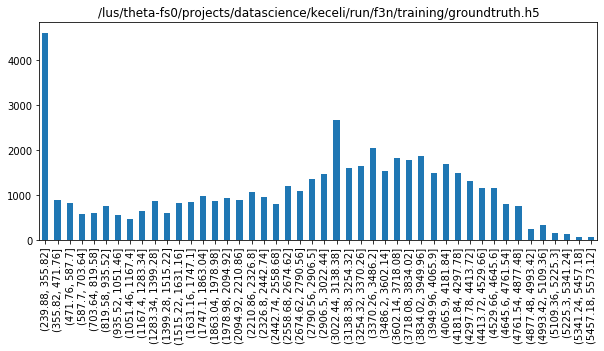

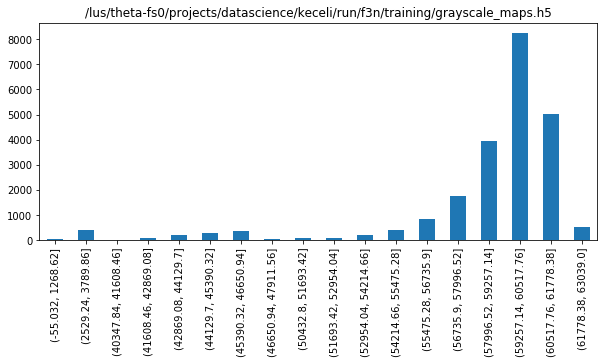

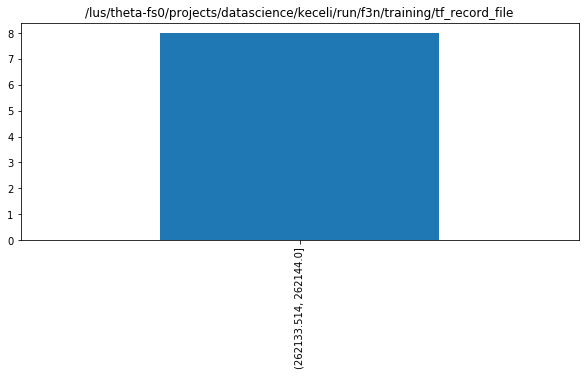

In [30]:
for file in df['Filename'].unique():
    tl = profile.GetIORequestDistribution(filepath=file, bins=50)
    tl.plot(kind='bar', figsize=(10, 4), title=file)
    plt.show()

### Data Transfer Sizes per Rank

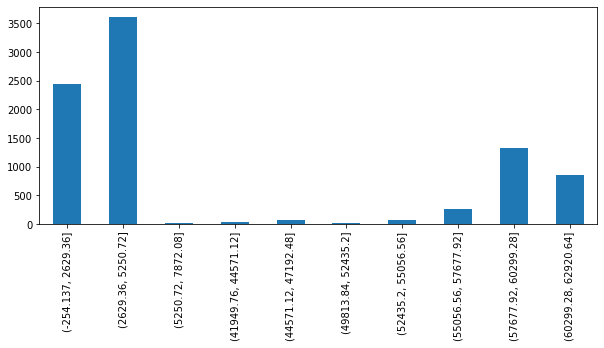

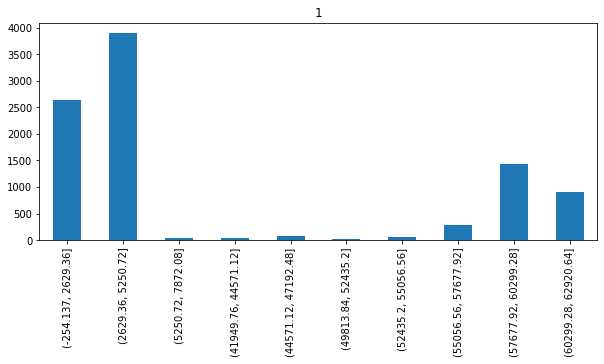

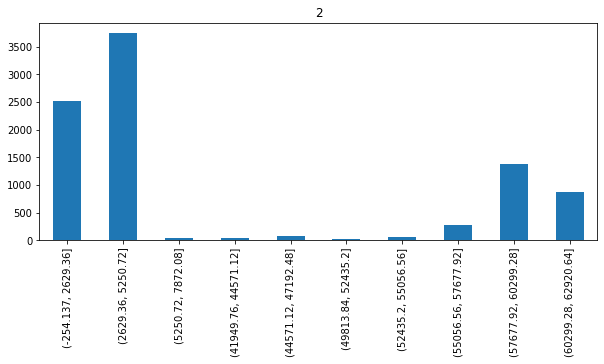

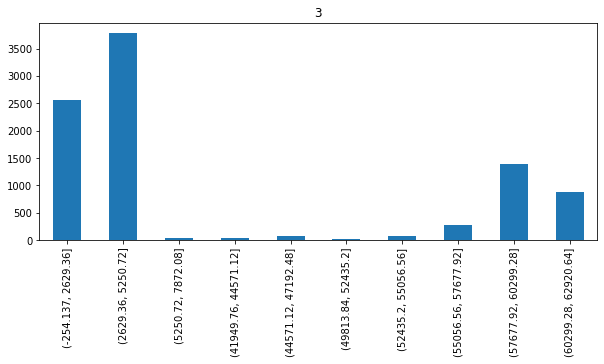

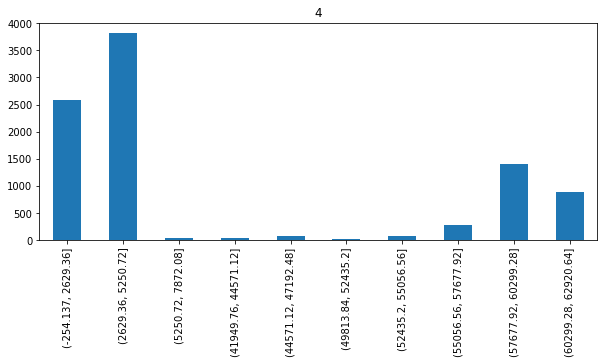

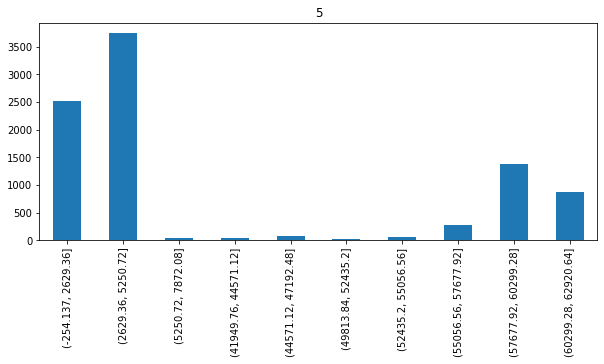

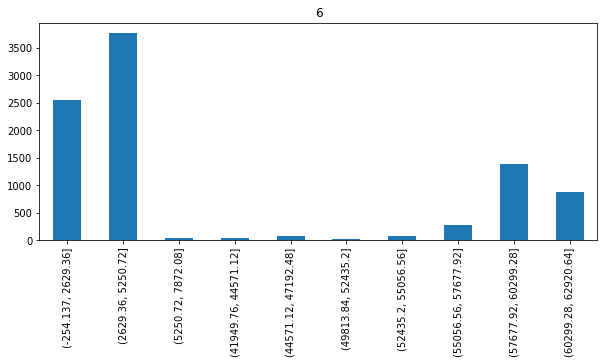

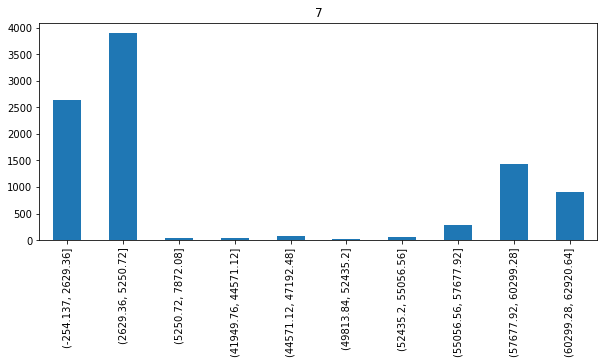

In [31]:
for rank in df['Rank'].unique():
    tl = profile.GetIORequestDistribution(rank=rank)
    tl.plot(kind='bar', figsize=(10, 4), title=rank)
    plt.show()

### File summary of each file accessed by the Application

In [32]:
pp = pprint.PrettyPrinter(indent=1)
for file in df['Filename'].unique():
    if 'h5' in file:
        pp.pprint(profile.GetFileSummary(file,ext='h5'))
    else:
        pp.pprint(profile.GetFileSummary(file,ext='tfrecord',tf_record_features=dict(
                                        center=tf.io.FixedLenFeature(shape=[1, 3], dtype=tf.int64),
                                        label_volume_name=tf.io.FixedLenFeature(shape=[1], dtype=tf.string),)
                                        ))

{'ext': 'h5',
 'filename': 'groundtruth',
 'io_size': 138292615.0,
 'io_time': 4.580730999999999,
 'path': '/lus/theta-fs0/projects/datascience/keceli/run/f3n/training/groundtruth.h5',
 'size': 22392831,
 'special': {'keys': [{'name': 'stack',
                       'obj': <HDF5 dataset "stack": shape (520, 520, 520), type "<i8">,
                       'shape': (520, 520, 520),
                       'size': 140608000,
                       'type': 'dataset'},
                      {'name': 'synapse-annotations',
                       'obj': <HDF5 dataset "synapse-annotations": shape (1,), type "|O">,
                       'shape': (1,),
                       'size': 1,
                       'type': 'dataset'},
                      {'name': 'transforms',
                       'obj': <HDF5 dataset "transforms": shape (2084, 2), type "<u8">,
                       'shape': (2084, 2),
                       'size': 4168,
                       'type': 'dataset'}],
             'na